In [ ]:
# clustering is used for customer segmentation
# kmeans is distance based

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#changing columns name
df=df.rename(columns={
    'Annual Income (k$)':'Annual_income',
    'Spending Score (1-100)':'Spend_score'
})

In [4]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X=df[['Annual_income', 'Spend_score']]
X.head()

,Annual_income,Spend_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# xtest     ytest     ypred
# xtrain    .fit_transform
# xtest     .transform

In [6]:
# scalling
from sklearn.preprocessing import StandardScaler
slr= StandardScaler()
xscaled= slr.fit_transform(X)

In [7]:
xscaled     # 2d numpy array

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [8]:
# making new df
x_new=pd.DataFrame(xscaled, columns=[X.columns])
x_new.head()

,Annual_income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [9]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5, random_state=5)
km.fit(xscaled)


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,5
,copy_x,True
,algorithm,'lloyd'


In [10]:
label=km.labels_
label

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [11]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [-0.2088822 , -0.01892551],
       [ 0.99158305,  1.23950275],
       [ 1.03782678, -1.26622991],
       [-1.32954532,  1.13217788]])

In [12]:
center_df=pd.DataFrame(km.cluster_centers_, columns=['p1','p2'])
center_df

,p1,p2
0,-1.307519,-1.136965
1,-0.208882,-0.018926
2,0.991583,1.239503
3,1.037827,-1.266230
4,-1.329545,1.132178


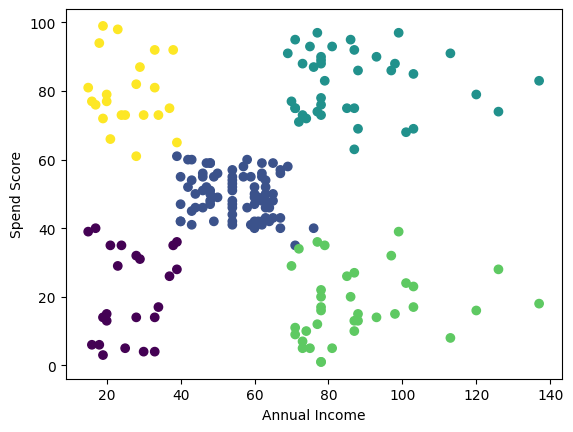

In [13]:
plt.scatter(X.Annual_income, X.Spend_score, c=label)
plt.xlabel('Annual Income')
plt.ylabel('Spend Score')
plt.show()

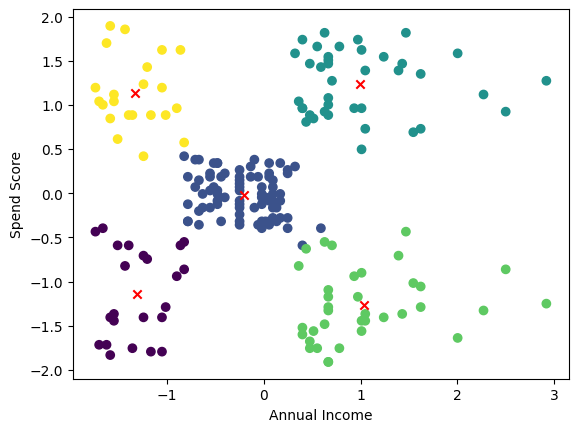

In [14]:
plt.scatter(x_new.Annual_income, x_new.Spend_score, c=label)
plt.scatter(center_df.p1, center_df.p2, color='red', marker='x')
plt.xlabel('Annual Income')
plt.ylabel('Spend Score')
plt.show()

In [ ]:
# evaluation
    # wcss(within customer sum of squares)
      

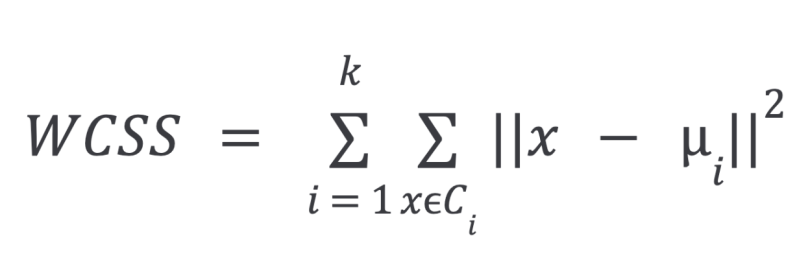

In [15]:
#wcss=inertia
km.inertia_

65.57885579985047

In [16]:
# no. of clusters
# Elbow method   :   for optimal number of clusters


wcss=[]
for i in range(2,11):
    kms= KMeans(n_clusters=i, random_state=5)
    kms.fit(xscaled)
    inertia=kms.inertia_
    wcss.append(inertia)

In [17]:
wcss

[270.70426664306717,
 157.70400815035947,
 108.92131661364357,
 65.57885579985047,
 57.369465804131494,
 49.53989243010953,
 37.74049218906543,
 32.91645050982751,
 29.736004455075257]

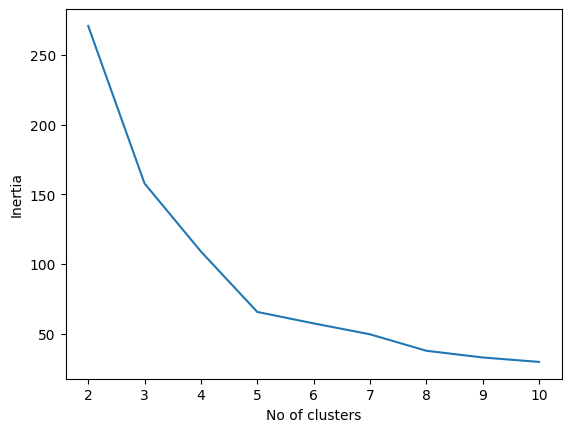

In [18]:
plt.plot(range(2,11), wcss)
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()